# Machine Learning Structural Protein Sequences Classification for Drug Discovery

## 1. Introduction

Proteins are fundamental biomolecules that carry out essential functions within living organisms. Understanding the structure of a protein is critical for drug discovery, as the structural conformation often determines the protein’s function, interaction with other molecules, and its role in disease mechanisms. Traditional experimental methods to determine protein structure, such as X-ray crystallography and NMR spectroscopy, are time-consuming and expensive.

Advances in computational biology and machine learning offer an efficient alternative. By leveraging sequence-based features, deep learning models such as Long Short-Term Memory (LSTM) networks and transformer-based language models can predict protein structural classes directly from amino acid sequences. These approaches accelerate the identification of potential drug targets and facilitate the design of novel therapeutics.

### 1.1. Purpose

The purpose of this project is to develop a machine learning pipeline for classifying structural protein sequences into their respective structural classes, using sequence data alone. Specifically, this project aims to:

1. Preprocess protein sequences and convert them into machine-readable formats suitable for deep learning models.

2. Apply NLP techniques, including embeddings and sequence modeling, to capture meaningful patterns in protein sequences.

3. Compare the performance of different models, such as LSTM networks and large language models (LLMs), in structural protein classification.

4. Provide insights into how computational sequence analysis can accelerate drug discovery and facilitate the identification of novel therapeutic targets.

### 1.2. Dataset

The protein sequence data used is publicly available at [Kaggle](https://www.kaggle.com/code/davidhjek/protein-sequence-classification) in a raw and no-duplicates form. It was retrieved from Research Collaboratory for Structural Bioinformatics (RCSB) Protein Data Bank (PDB).

- `pdb_data_no_dups.csv` contains protein metadata which includes details on protein classification, extraction methods, etc.

| Column                     | Description                                                                                 |
| -------------------------- | ------------------------------------------------------------------------------------------- |
| `structureId`              | Unique identifier for each protein structure in the PDB (Protein Data Bank).                |
| `classification`           | Structural class or category of the protein (e.g., enzyme, transporter).                    |
| `experimentalTechnique`    | Method used to determine the protein structure (e.g., X-ray crystallography, NMR, cryo-EM). |
| `macromoleculeType`        | Type of macromolecule (e.g., protein, DNA, RNA).                                            |
| `residueCount`             | Number of amino acid residues in the protein chain.                                         |
| `resolution`               | Resolution of the protein structure (Ångströms), relevant for X-ray crystallography.        |
| `structureMolecularWeight` | Molecular weight of the protein structure (Daltons).                                        |
| `crystallizationMethod`    | Method used for crystallizing the protein (if applicable).                                  |
| `crystallizationTemp`      | Temperature used for protein crystallization (Kelvin or Celsius).                           |
| `densityMatthews`          | Matthews coefficient, a measure of crystal packing density.                                 |
| `densityPercentSol`        | Estimated solvent content (%) in the crystal.                                               |
| `pdbxDetails`              | Additional details about the structure (text description).                                  |
| `phValue`                  | pH at which the protein structure was determined.                                           |
| `publicationYear`          | Year the protein structure was published in the PDB.                                        |

    
- `pdb_data_seq.csv` contains >400,000 protein structure sequences.

| Column              | Description                                                                   |
| ------------------- | ----------------------------------------------------------------------------- |
| `structureId`       | Unique identifier for the protein structure (matches `pdb_data_no_dups.csv`). |
| `chainId`           | Identifier for the protein chain within the structure (A, B, C, etc.).        |
| `sequence`          | Amino acid sequence of the chain (one-letter codes).                          |
| `residueCount`      | Number of residues in this chain.                                             |
| `macromoleculeType` | Type of macromolecule (e.g., protein, DNA, RNA).                              |

### 1.3. Amino Acid Code

Protein sequences are expressed as a series of one letter abbreviations for each amino acid, given below:

#### 1.3.1. Alphabetical

| Amino Acid    | One-Letter Code |
| ------------- | --------------- |
| Alanine       | A               |
| Arginine      | R               |
| Asparagine    | N               |
| Aspartic Acid | D               |
| Cysteine      | C               |
| Glutamic Acid | E               |
| Glutamine     | Q               |
| Glycine       | G               |
| Histidine     | H               |
| Isoleucine    | I               |
| Leucine       | L               |
| Lysine        | K               |
| Methionine    | M               |
| Phenylalanine | F               |
| Proline       | P               |
| Serine        | S               |
| Threonine     | T               |
| Tryptophan    | W               |
| Tyrosine      | Y               |
| Valine        | V               |

#### 1.3.2. By Properties

##### Nonpolar, Aliphatic
| One-letter | Amino Acid       | Notes                        |
|------------|-----------------|-------------------------------|
| A          | Alanine          | Small, hydrophobic            |
| G          | Glycine          | Smallest residue, flexible    |
| I          | Isoleucine       | Hydrophobic, aliphatic        |
| L          | Leucine          | Hydrophobic, aliphatic        |
| M          | Methionine       | Contains sulfur               |
| P          | Proline          | Cyclic, rigid structure       |
| V          | Valine           | Hydrophobic, aliphatic        |

##### Aromatic
| One-letter | Amino Acid       | Notes                        |
|------------|-----------------|-------------------------------|
| F          | Phenylalanine    | Nonpolar, aromatic            |
| W          | Tryptophan       | Aromatic, slightly polar      |
| Y          | Tyrosine         | Polar, aromatic               |

##### Polar, Uncharged
| One-letter | Amino Acid       | Notes                        |
|------------|-----------------|-------------------------------|
| C          | Cysteine         | Can form disulfide bonds      |
| N          | Asparagine       | Polar, uncharged              |
| Q          | Glutamine        | Polar, uncharged              |
| S          | Serine           | Polar, uncharged              |
| T          | Threonine        | Polar, uncharged              |

##### Acidic (Negative)
| One-letter | Amino Acid       | Notes                        |
|------------|-----------------|-------------------------------|
| D          | Aspartic Acid    | Acidic, negatively charged    |
| E          | Glutamic Acid    | Acidic, negatively charged    |

##### Basic (Positive)
| One-letter | Amino Acid       | Notes                        |
|------------|-----------------|-------------------------------|
| K          | Lysine           | Basic, positively charged     |
| R          | Arginine         | Basic, positively charged     |
| H          | Histidine        | Basic, partially charged at physiological pH |

##### Ambiguous / Wildcards
| One-letter | Amino Acid / Meaning              | Notes                        |
|------------|---------------------------------|-------------------------------|
| B          | Aspartic Acid (D) / Asparagine (N) | Ambiguous                     |
| Z          | Glutamic Acid (E) / Glutamine (Q)  | Ambiguous                     |
| X          | Unknown amino acid                 | Wildcard                       |
| J          | Leucine (L) / Isoleucine (I)      | Ambiguous                     |
| U          | Selenocysteine                     | Rare non-standard amino acid  |
| O          | Pyrrolysine                        | Rare non-standard amino acid  |


## 2. Import Libraries and Datasets

### 2.1. Import Libraries

In [27]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from fuzzywuzzy import process

# NLP / Deep Learning (LSTM, embeddings)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_hub as hub

# LLM / Transformers (protein language models)
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import sentencepiece

# Bioinformatics / Protein Utilities
from Bio import SeqIO

# Notebook Utilities
from tqdm.notebook import tqdm
import ipywidgets as widgets

### 2.2. Import Datasets

In [2]:
# Metadata
metadata = pd.read_csv("pdb_data_no_dups.csv")

# Sequences
sequences = pd.read_csv("pdb_data_seq.csv")

print("Metadata:")
display(metadata.head())
display(metadata.info())
display(metadata.shape)
print()
print("Sequences:")
display(sequences.head())
display(sequences.info())
display(sequences.shape)

Metadata:


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

None

(141401, 14)


Sequences:


,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467304 entries, 0 to 467303
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        467304 non-null  object
 1   chainId            467294 non-null  object
 2   sequence           467276 non-null  object
 3   residueCount       467304 non-null  int64 
 4   macromoleculeType  432487 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.8+ MB


None

(467304, 5)

### 2.3. Analysis of Features

#### 2.3.1. Metadata

| Column                     | Use for modeling? | Notes                                                         |
| -------------------------- | ----------------- | ------------------------------------------------------------- |
| `structureId`              | ✅ Yes             | Key for merging sequences with labels                         |
| `classification`           | ✅ Yes             | **Target variable** (structural class)                            |
| `experimentalTechnique`    | ❌ No              | Optional metadata, not used for sequence-based ML             |
| `macromoleculeType`        | ❌ No              | Could filter out non-proteins, but not a feature for LSTM/LLM |
| `residueCount`             | ❌ No              | Sequence length is captured from sequences themselves         |
| `resolution`               | ❌ No              | Metadata, not used in current model                           |
| `structureMolecularWeight` | ❌ No              | Metadata                                                      |
| `crystallizationMethod`    | ❌ No              | Metadata                                                      |
| `crystallizationTempK`     | ❌ No              | Metadata                                                      |
| `densityMatthews`          | ❌ No              | Metadata                                                      |
| `densityPercentSol`        | ❌ No              | Metadata                                                      |
| `pdbxDetails`              | ❌ No              | Metadata                                                      |
| `phValue`                  | ❌ No              | Metadata                                                      |
| `publicationYear`          | ❌ No              | Metadata                                                      |

#### 2.3.2. Sequences

| Column              | Use for modeling? | Notes                                                                   |
| ------------------- | ----------------- | ----------------------------------------------------------------------- |
| `structureId`       | ✅ Yes             | Merge key                                                               |
| `chainId`           | ❌ Optional        | Could treat different chains separately; usually just keeps unique rows |
| `sequence`          | ✅ Yes             | **Main feature** for NLP/LLM/LSTM                                       |
| `residueCount`      | ❌ Optional        | Length can be derived from `sequence`                                   |
| `macromoleculeType` | ❌ Optional        | Could filter out non-proteins, usually redundant                        |


### 2.4. Trim and Merge Datasets

In [3]:
# Merge sequences with metadata for complete dataset
data_all = pd.merge(sequences[['chainId', 'sequence', 'structureId']], metadata, on='structureId', how='inner', suffixes=('', '')) # Avoids redundant columns duplicating

# Keep only protein data as a new df
data = data_all[data_all['macromoleculeType'] == 'Protein']

# Drop missing label and sequences since these will be the target and feature of models later
data = data[data['classification'].notnull()]
data = data[data['sequence'].notnull()]

# Reset index
data.reset_index()

# Check
print(data.shape)
data.head()

(346321, 16)


,chainId,sequence,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
4,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
8,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
11,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
12,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [4]:
# Rename columns for readability and consistency
# All lowercase and separate words with underscores
data = data.rename(columns={
    'structureId': 'structure_id',
    'chainId': 'chain_id',
    'sequence': 'sequence',
    'residueCount': 'residue_count',
    'macromoleculeType': 'macromolecule_type',
    'classification': 'classification'
})

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 346321 entries, 4 to 471148
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   chain_id                  346319 non-null  object 
 1   sequence                  346321 non-null  object 
 2   structure_id              346321 non-null  object 
 3   classification            346321 non-null  object 
 4   experimentalTechnique     346321 non-null  object 
 5   macromolecule_type        346321 non-null  object 
 6   residue_count             346321 non-null  int64  
 7   resolution                330228 non-null  float64
 8   structureMolecularWeight  346321 non-null  float64
 9   crystallizationMethod     240593 non-null  object 
 10  crystallizationTempK      243930 non-null  float64
 11  densityMatthews           307477 non-null  float64
 12  densityPercentSol         307611 non-null  float64
 13  pdbxDetails               294693 non-null  object

,chain_id,sequence,structure_id,classification,experimentalTechnique,macromolecule_type,residue_count,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
4,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
8,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
11,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
12,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


## 3. Exploratory Data Analysis - Initial

In this section, we will explore the feature (`sequence`) and target (`classification`) variables in the raw data.

### 3.1. Sequence

#### 3.1.1. Length

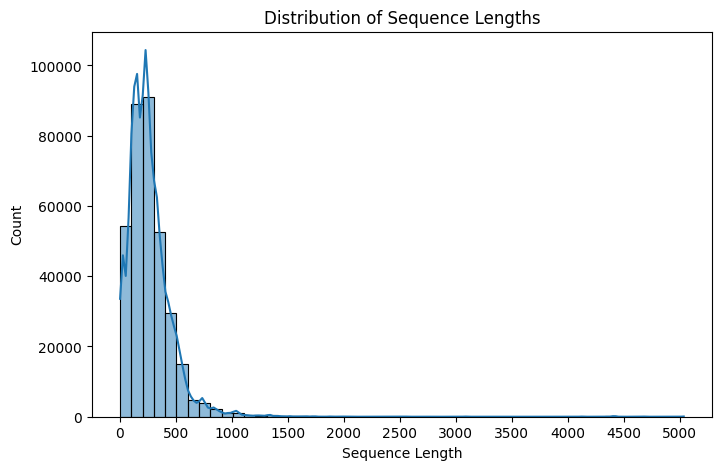

In [5]:
# Add new column
data['sequence_length'] = data['sequence'].str.len()

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(data['sequence_length'], bins=50, kde=True)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.xticks(ticks=range(0, 5500, 500))
plt.ylabel('Count')
plt.show()

# Describe distribution
data['sequence_length'].describe()

# Create function
def sequence_lengths(df):
    df['sequence_length'] = df['sequence'].apply(len)
    df['sequence_length'].hist(bins=50)
    plt.xlabel('Sequence Length')
    plt.ylabel('Number of Sequences')
    plt.show()

#### 3.1.2. Properties

##### 3.1.2.1. Amino Acid Composition

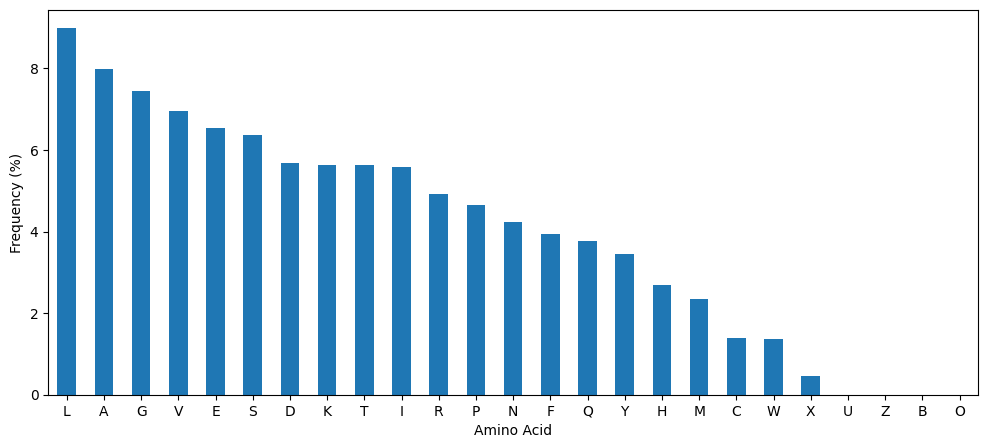

In [6]:
aa_counts = Counter("".join(data['sequence']))
aa_freq_pct = {aa: (count / sum(aa_counts.values())) * 100 for aa, count in aa_counts.items()}

# Convert to DataFrame for plotting
aa_df = pd.DataFrame(list(aa_freq_pct.items()), columns=['Amino Acid', 'Frequency']).sort_values('Frequency', ascending=False)

aa_df.plot(kind='bar', x='Amino Acid', y='Frequency', figsize=(12,5))
plt.xticks(rotation=0)
plt.ylabel('Frequency (%)')
plt.legend().set_visible(False)
plt.show()

# Create function
def aa_composition(df):
    aa_counts = Counter("".join(df['sequence']))
    aa_freq = {aa: count / sum(aa_counts.values()) * 100 for aa, count in aa_counts.items()}
    aa_df = pd.DataFrame(list(aa_freq.items()), columns=['Amino Acid', 'Frequency']).sort_values('Frequency', ascending=False)
    aa_df.plot(kind='bar', x='AminoAcid', y='Frequency', legend=False)
    plt.ylabel('Frequency (%)')
    plt.xticks(rotation=45)
    plt.show()

##### 3.1.2.2. Biochemical Properties

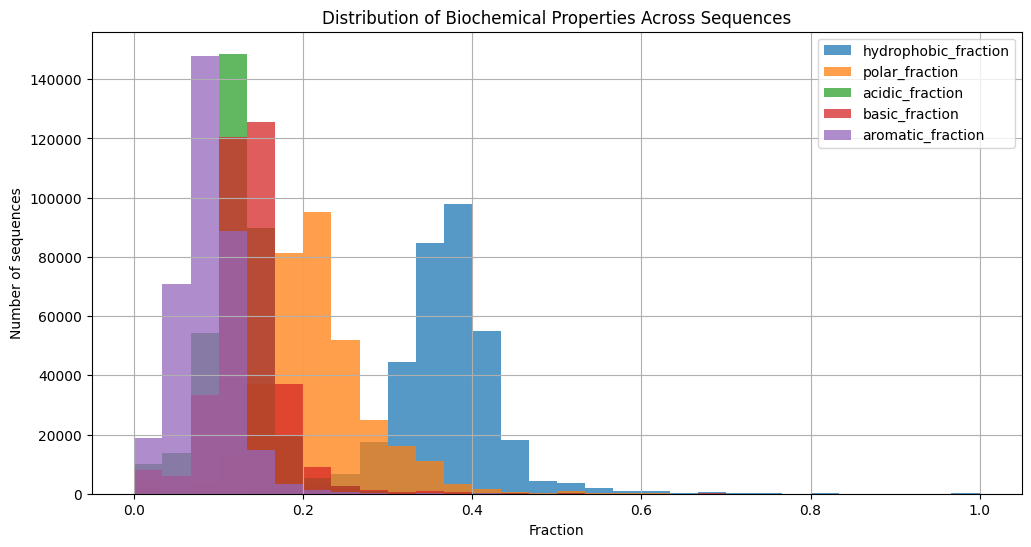

In [7]:
# Hydrophobic (nonpolar) residues
hydrophobic = set('AILMFWV')

# Polar uncharged residues
polar_uncharged = set('CSTNQ')

# Acidic (negatively charged)
acidic = set('DE')

# Basic (positively charged)
basic = set('KRH')

# Aromatic residues
aromatic = set('FYW')

# Compute fraction for each property
def aa_fraction(seq, aa_set):
    return sum(aa in aa_set for aa in seq) / len(seq)

# Apply to data
data['hydrophobic_fraction'] = data['sequence'].apply(lambda s: aa_fraction(s, hydrophobic))
data['polar_fraction'] = data['sequence'].apply(lambda s: aa_fraction(s, polar_uncharged))
data['acidic_fraction'] = data['sequence'].apply(lambda s: aa_fraction(s, acidic))
data['basic_fraction'] = data['sequence'].apply(lambda s: aa_fraction(s, basic))
data['aromatic_fraction'] = data['sequence'].apply(lambda s: aa_fraction(s, aromatic))

# Plot
properties = ['hydrophobic_fraction', 'polar_fraction', 'acidic_fraction', 'basic_fraction', 'aromatic_fraction']

plt.figure(figsize=(12,6))
for prop in properties:
    data[prop].hist(alpha=0.75, bins=30, label=prop)

plt.xlabel('Fraction')
plt.ylabel('Number of sequences')
plt.title('Distribution of Biochemical Properties Across Sequences')
plt.legend()
plt.show()

# Average property fraction per class
class_props = data.groupby('classification')[properties].mean()
class_props

# Create function
def biochemical_properties(df):
    hydrophobic = set('AILMFWV')
    polar_uncharged = set('CSTNQ')
    acidic = set('DE')
    basic = set('KRH')
    aromatic = set('FYW')

    df['hydrophobic_fraction'] = df['sequence'].apply(lambda s: sum(aa in hydrophobic for aa in s)/len(s))
    df['polar_fraction'] = df['sequence'].apply(lambda s: sum(aa in polar_uncharged for aa in s)/len(s))
    df['acidic_fraction'] = df['sequence'].apply(lambda s: sum(aa in acidic for aa in s)/len(s))
    df['basic_fraction'] = df['sequence'].apply(lambda s: sum(aa in basic for aa in s)/len(s))
    df['aromatic_fraction'] = df['sequence'].apply(lambda s: sum(aa in aromatic for aa in s)/len(s))
    
    properties = ['hydrophobic_fraction', 'polar_fraction', 'acidic_fraction', 'basic_fraction', 'aromatic_fraction']

    plt.figure(figsize=(12,6))
    for prop in properties:
        data[prop].hist(alpha=0.75, bins=30, label=prop)

    plt.xlabel('Fraction')
    plt.ylabel('Number of sequences')
    plt.title('Distribution of Biochemical Properties Across Sequences')
    plt.legend()
    plt.show()

    return df

##### 3.1.2.3. K-mer Counts

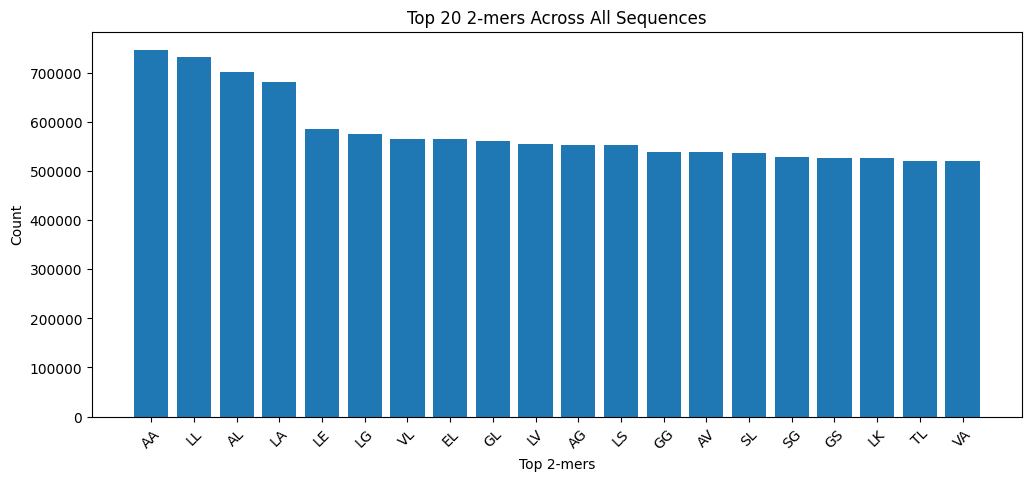

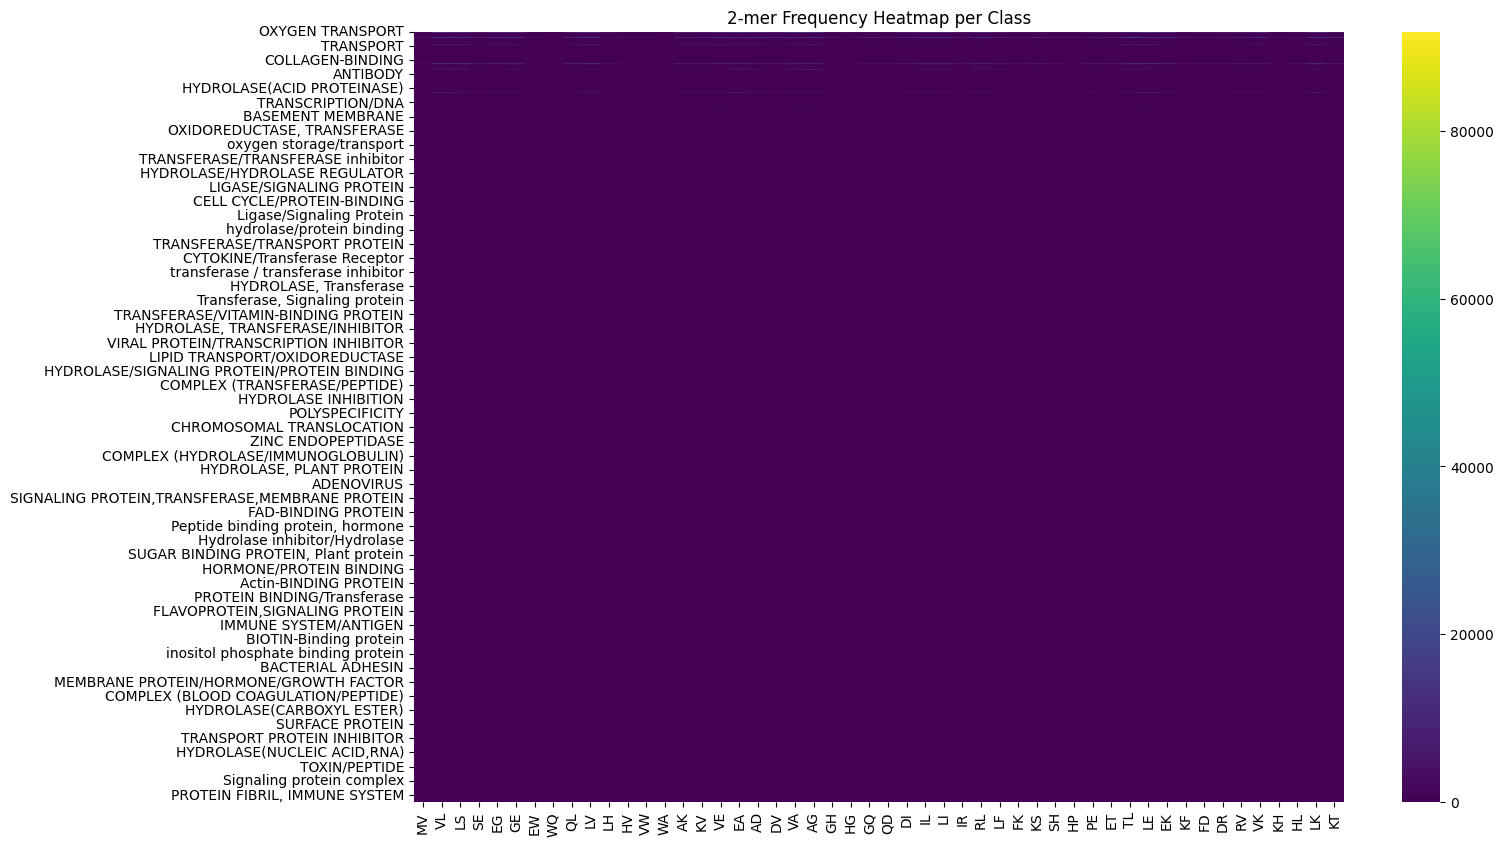

In [8]:
def get_kmers(seq, k=2):
    """Return list of all k-mers in a sequence."""
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

# Example: count dipeptides (k=2) across all sequences
k = 2
all_kmers = Counter()

for seq in data['sequence']:
    all_kmers.update(get_kmers(seq, k=k))

# Convert to DataFrame for easy plotting
kmer_df = pd.DataFrame(all_kmers.items(), columns=['k-mer', 'Count']).sort_values('Count', ascending=False)

# Plot
top_n = 20
plt.figure(figsize=(12,5))
plt.bar(kmer_df['k-mer'].head(top_n), kmer_df['Count'].head(top_n))
plt.xticks(rotation=45)
plt.xlabel(f'Top {k}-mers')
plt.ylabel('Count')
plt.title(f'Top {top_n} {k}-mers Across All Sequences')
plt.show()

# Frequency
# Create a dictionary of Counter objects per class
class_kmers = {cls: Counter() for cls in data['classification'].unique()}

for cls, group in data.groupby('classification'):
    for seq in group['sequence']:
        class_kmers[cls].update(get_kmers(seq, k=k))

# Convert to DataFrame (classes x k-mers)
class_kmer_df = pd.DataFrame.from_dict(class_kmers, orient='index').fillna(0)

# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(class_kmer_df.iloc[:, :50], cmap='viridis')  # first 50 k-mers for readability
plt.title(f'{k}-mer Frequency Heatmap per Class')
plt.show()


### 3.2. Classification

#### 3.2.1. Values

In [9]:
print(Counter(data['classification']))
print(len(Counter(data['classification'])))

Counter({'HYDROLASE': 46336, 'TRANSFERASE': 36424, 'OXIDOREDUCTASE': 34321, 'IMMUNE SYSTEM': 15615, 'LYASE': 11682, 'HYDROLASE/HYDROLASE INHIBITOR': 11218, 'TRANSCRIPTION': 8919, 'VIRAL PROTEIN': 8495, 'TRANSPORT PROTEIN': 8371, 'VIRUS': 6972, 'SIGNALING PROTEIN': 6469, 'ISOMERASE': 6356, 'LIGASE': 4964, 'MEMBRANE PROTEIN': 4891, 'PROTEIN BINDING': 4884, 'STRUCTURAL PROTEIN': 4335, 'CHAPERONE': 4156, 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION': 3548, 'SUGAR BINDING PROTEIN': 3474, 'DNA BINDING PROTEIN': 3199, 'PHOTOSYNTHESIS': 3139, 'ELECTRON TRANSPORT': 3047, 'TRANSFERASE/TRANSFERASE INHIBITOR': 3032, 'METAL BINDING PROTEIN': 3023, 'CELL ADHESION': 2999, 'UNKNOWN FUNCTION': 2842, 'PROTEIN TRANSPORT': 2674, 'TOXIN': 2626, 'CELL CYCLE': 2496, 'RNA BINDING PROTEIN': 1969, 'DE NOVO PROTEIN': 1635, 'HORMONE': 1523, 'GENE REGULATION': 1501, 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR': 1474, 'APOPTOSIS': 1382, 'MOTOR PROTEIN': 1238, 'PROTEIN FIBRIL': 1205, 'METAL TRANSPORT': 1166, 'VIRAL PROTEIN/I

There are too many classes here to reliably model (4468). I will:
1. Check for redundancy and combine equivalent classes, and
2. Group rare classes into an "Other" category.

In [10]:
# Normalize classification text by making all uppercase and stripping whitespace and punctuation
data['classification'] = (
    data['classification']
    .str.upper()
    .str.strip()
    .str.replace(r'[^A-Z0-9 ]', '', regex=True)
)

# Extract top 20 classes
#top_20_classes = data['classification'].value_counts().head(20).index.tolist()
top_50_classes = data['classification'].value_counts().head(50).index.tolist()

# Check classes 21-30 for safety
#classes_21_30 = data['classification'][20:30]
#print(f"21st - 30th classes: {classes_21_30}")

# Check classes 31-50 for safety
#classes_31_50 = data['classification'][30:50]
#print(f"31st - 50th classes: {classes_31_50}")

# Use Fuzzywuzzy to check for synonyms
synonyms = {}

for c in top_50_classes:
    matches = process.extract(c, top_50_classes, limit=10)
    # Keep matches with similarity >= 90 (adjust threshold if needed)
    synonyms[c] = [m[0] for m in matches if m[1] >= 90 and m[0] != c]

synonyms

{'HYDROLASE': ['HYDROLASEHYDROLASE INHIBITOR'],
 'TRANSFERASE': ['TRANSFERASETRANSFERASE INHIBITOR'],
 'OXIDOREDUCTASE': ['OXIDOREDUCTASEOXIDOREDUCTASE INHIBITOR'],
 'IMMUNE SYSTEM': ['VIRAL PROTEINIMMUNE SYSTEM'],
 'HYDROLASEHYDROLASE INHIBITOR': ['HYDROLASE'],
 'LYASE': ['LYASELYASE INHIBITOR'],
 'TRANSCRIPTION': ['TRANSCRIPTION REGULATOR'],
 'VIRAL PROTEIN': ['VIRAL PROTEINIMMUNE SYSTEM'],
 'TRANSPORT PROTEIN': ['PROTEIN TRANSPORT'],
 'VIRUS': ['VIRUS LIKE PARTICLE'],
 'SIGNALING PROTEIN': [],
 'ISOMERASE': [],
 'STRUCTURAL GENOMICS UNKNOWN FUNCTION': ['UNKNOWN FUNCTION'],
 'LIGASE': [],
 'MEMBRANE PROTEIN': [],
 'PROTEIN BINDING': ['SUGAR BINDING PROTEIN',
  'DNA BINDING PROTEIN',
  'METAL BINDING PROTEIN',
  'RNA BINDING PROTEIN',
  'LIPID BINDING PROTEIN'],
 'TRANSFERASETRANSFERASE INHIBITOR': ['TRANSFERASE'],
 'STRUCTURAL PROTEIN': [],
 'CHAPERONE': [],
 'SUGAR BINDING PROTEIN': ['PROTEIN BINDING'],
 'DNA BINDING PROTEIN': ['PROTEIN BINDING', 'RNA BINDING PROTEIN'],
 'PHOTOSYNTH

Based on the top 50 classes, I will make a final set of no more than 50 (best for language learning models):
1. The top 50 classes, with any synonyms included.
3. An "OTHER" class to capture the remainder of any biologically relevant classes.
4. Classes must be represented by at least 200 sequences.

#### 3.2.2. Frequency

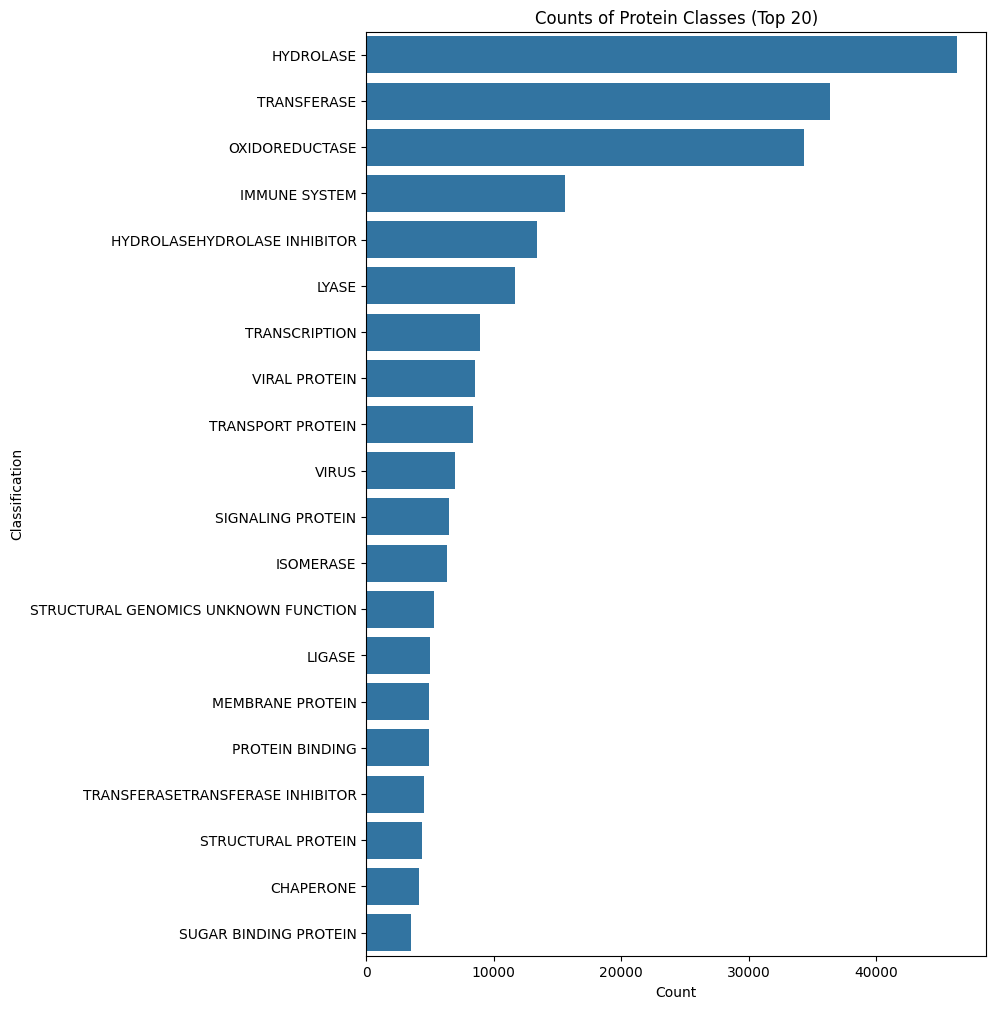

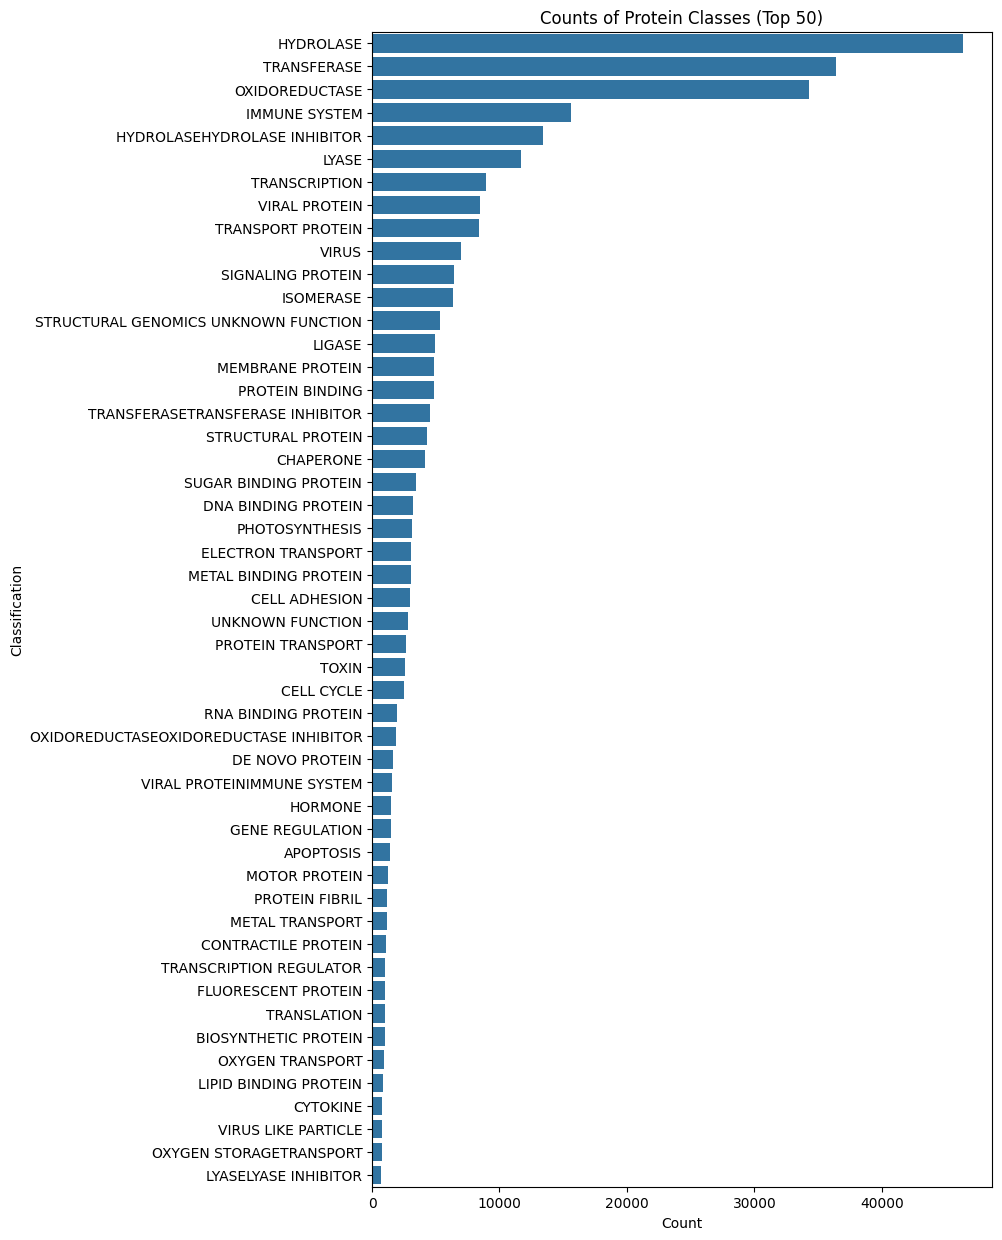

In [11]:
# Compute counts for top 20
counts = data['classification'].value_counts().sort_values(ascending=False).head(20)

# Plot descending barplot
plt.figure(figsize=(8, 12))
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel("Count")
plt.ylabel("Classification")
plt.title("Counts of Protein Classes (Top 20)")
plt.show()

# Compute counts for top 50
counts = data['classification'].value_counts().sort_values(ascending=False).head(50)

# Plot descending barplot
plt.figure(figsize=(8, 15))
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel("Count")
plt.ylabel("Classification")
plt.title("Counts of Protein Classes (Top 50)")
plt.yticks(fontsize=10)
plt.show()

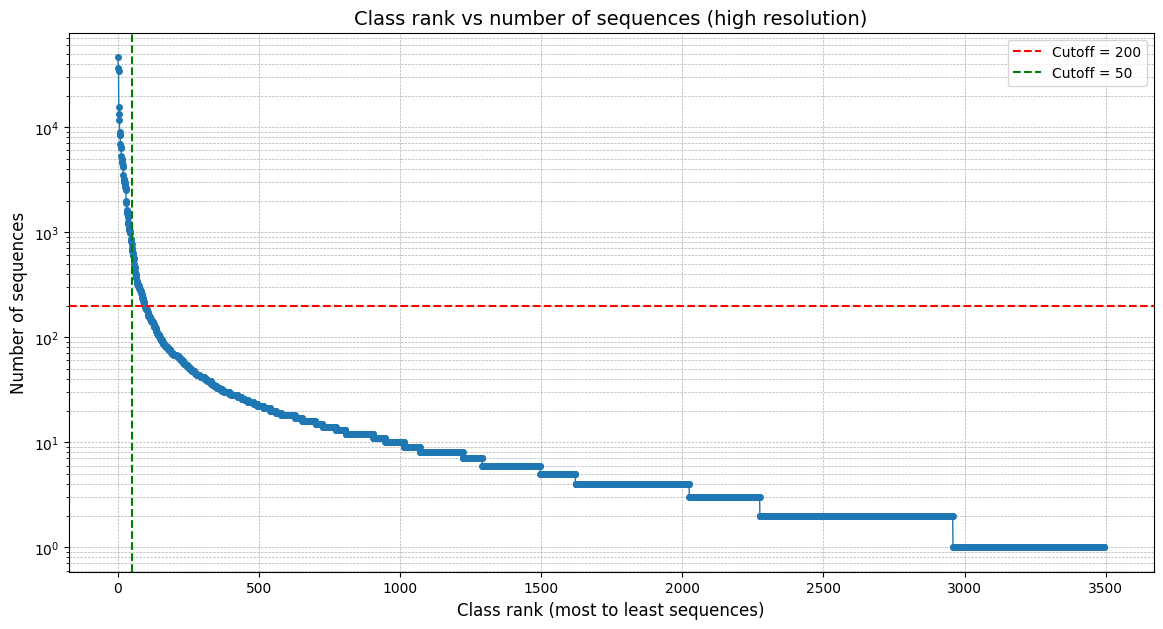

In [12]:
# Count sequences per class
class_counts = data['classification'].value_counts().sort_values(ascending=False)

# Create rank index
ranks = range(1, len(class_counts)+1)

# Plot
plt.figure(figsize=(14,7))
plt.plot(ranks, class_counts.values, marker='o', markersize=4, linewidth=1)
plt.xlabel('Class rank (most to least sequences)', fontsize=12)
plt.ylabel('Number of sequences', fontsize=12)
plt.title('Class rank vs number of sequences (high resolution)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Cutoff lines
# Sequences (> 200)
y_cutoff = 200
plt.axhline(y=y_cutoff, color='red', linestyle='--', label=f'Cutoff = {y_cutoff}')
# Number of classes (< 50)
x_cutoff = 50
plt.axvline(x=x_cutoff, color='green', linestyle='--', label=f'Cutoff = {x_cutoff}')
plt.legend()

# Optional: log scale to emphasize lower counts
plt.yscale('log')
plt.show()

In [13]:
# Filter classes (currently top 50)
top_classes = class_counts.head(50).index.tolist()
top_classes

['HYDROLASE',
 'TRANSFERASE',
 'OXIDOREDUCTASE',
 'IMMUNE SYSTEM',
 'HYDROLASEHYDROLASE INHIBITOR',
 'LYASE',
 'TRANSCRIPTION',
 'VIRAL PROTEIN',
 'TRANSPORT PROTEIN',
 'VIRUS',
 'SIGNALING PROTEIN',
 'ISOMERASE',
 'STRUCTURAL GENOMICS UNKNOWN FUNCTION',
 'LIGASE',
 'MEMBRANE PROTEIN',
 'PROTEIN BINDING',
 'TRANSFERASETRANSFERASE INHIBITOR',
 'STRUCTURAL PROTEIN',
 'CHAPERONE',
 'SUGAR BINDING PROTEIN',
 'DNA BINDING PROTEIN',
 'PHOTOSYNTHESIS',
 'ELECTRON TRANSPORT',
 'METAL BINDING PROTEIN',
 'CELL ADHESION',
 'UNKNOWN FUNCTION',
 'PROTEIN TRANSPORT',
 'TOXIN',
 'CELL CYCLE',
 'RNA BINDING PROTEIN',
 'OXIDOREDUCTASEOXIDOREDUCTASE INHIBITOR',
 'DE NOVO PROTEIN',
 'VIRAL PROTEINIMMUNE SYSTEM',
 'HORMONE',
 'GENE REGULATION',
 'APOPTOSIS',
 'MOTOR PROTEIN',
 'PROTEIN FIBRIL',
 'METAL TRANSPORT',
 'CONTRACTILE PROTEIN',
 'TRANSCRIPTION REGULATOR',
 'FLUORESCENT PROTEIN',
 'TRANSLATION',
 'BIOSYNTHETIC PROTEIN',
 'OXYGEN TRANSPORT',
 'LIPID BINDING PROTEIN',
 'CYTOKINE',
 'VIRUS LIKE PART

In [14]:
# When finished with final classes
# top_classes = [...]  # list of your 50 chosen classes
data_filtered = data[data['classification'].isin(top_classes)].reset_index(drop=True) # Do EDA on these (move above sequences section)


print(data_filtered.shape)
data_filtered.head(10)

(291219, 22)


,chain_id,sequence,structure_id,classification,experimentalTechnique,macromolecule_type,residue_count,resolution,structureMolecularWeight,crystallizationMethod,...,densityPercentSol,pdbxDetails,phValue,publicationYear,sequence_length,hydrophobic_fraction,polar_fraction,acidic_fraction,basic_fraction,aromatic_fraction
0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,...,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,154,0.409091,0.116883,0.129870,0.227273,0.064935
1,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,...,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,154,0.415584,0.116883,0.129870,0.220779,0.071429
2,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,...,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,154,0.415584,0.116883,0.129870,0.220779,0.071429
3,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,104M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,153,1.71,18030.63,NaN,...,34.30,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 7.0",7.0,1999.0,153,0.405229,0.111111,0.137255,0.228758,0.071895
4,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,105M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,153,2.02,18030.63,NaN,...,33.00,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 9.0",9.0,1999.0,153,0.405229,0.111111,0.137255,0.228758,0.071895
5,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,106M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.99,18181.84,NaN,...,59.70,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,154,0.409091,0.116883,0.129870,0.227273,0.077922
6,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,107M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.09,18208.89,NaN,...,60.10,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,154,0.409091,0.116883,0.129870,0.227273,0.077922
7,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,108M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.67,18208.89,NaN,...,60.00,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",7.0,1999.0,154,0.409091,0.116883,0.129870,0.227273,0.077922
8,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,109M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.83,18133.80,NaN,...,59.90,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,154,0.409091,0.116883,0.129870,0.227273,0.071429
9,A,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,10GS,TRANSFERASETRANSFERASE INHIBITOR,X-RAY DIFFRACTION,Protein,418,2.20,47830.70,NaN,...,52.86,pH 5.8,5.8,1997.0,209,0.377990,0.210526,0.110048,0.105263,0.100478


## 4. Data Preprocessing I (Class Selection) 

In this section, we will determine the final classes and make sure all sequences are appropriate for modeling.

### 4.1. Classification

### 4.2. Sequences

Here we will ensure all sequences are ready for modeling.

In [15]:
# Ensure sequences contain only the standard 20 amino acids
valid_aas = set('ACDEFGHIKLMNPQRSTVWY')  # standard 20 amino acids

def clean_sequence(seq):
    seq = seq.upper().strip()
    return ''.join([aa for aa in seq if aa in valid_aas])

# Maintain positions of invalid AAs using X placeholder
#def clean_sequence_keep_placeholder(seq):
#    seq = seq.upper().strip()
#    return ''.join([aa if aa in valid_aas else 'X' for aa in seq])

data_filtered['sequence'] = data_filtered['sequence'].apply(clean_sequence)

### 4.3. Define Variables for Model

In [16]:
# Placeholder - each model is different and will be replaced accordingly
X = data_filtered['sequence']
y = data_filtered['classification']

## 5. Exploratory Data Analysis - Refined

Here, the data analysis above will be revisited on the final selected classes only

## 6. Data Preprocessing II (Preparation for Modeling)

## 7. Model Training and Evaluation

### 7.1. Overview of Modeling Approaches

- NLP / k-mer bag-of-words features with Random Forest/SVM

- LSTM: Sequence-based recurrent model

- LLM: Using embeddings from a protein language model

### 7.2. Split Dataset (Training, Validation, Test)

In [ ]:
def train_test_split_custom (X, y, size, state):
    """
    Generates training, validation, and test datasets given parameters:
    X: feature(s)
    y: target
    size: size (%) of training set
    state: random state value
    """
    X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=1-size/100,
    stratify=y,
    random_state=state
    )

    X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

    return X_train, X_val, X_test, y_train, y_val, y_test

size = 70   # Size (%) of training set
state = 42

# Run function
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split_custom(X, y, size, state)

# Check shapes
print("X:")
print(X_train.shape, X_val.shape, X_test.shape)

print()
print("y:")
print(y_train.shape, y_val.shape, y_test.shape)

X:
(203853,)
(43683,)
(43683,)

y:
(203853,)
(43683,)
(43683,)


### 7.3. Model-Specific Preprocessing

#### 7.3.1. NLP

In [25]:
# Split sequences into overlapping k-mers (k=3)
def kmer_seq(seq, k=3):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

# Use list comprehension instead of .apply()
X_train_nlp = [' '.join(kmer_seq(seq, k=3)) for seq in X_train]
X_val_nlp   = [' '.join(kmer_seq(seq, k=3)) for seq in X_val]
X_test_nlp  = [' '.join(kmer_seq(seq, k=3)) for seq in X_test]

# Check first few examples
print(X_train_nlp[:5])

# Initialize vectorizer
vectorizer = CountVectorizer()  # or TfidfVectorizer() ?

# Fit on training data and transform
X_train_nlp = vectorizer.fit_transform(X_train_nlp)

# Transform validation and test sets
X_val_nlp   = vectorizer.transform(X_val_nlp)
X_test_nlp  = vectorizer.transform(X_test_nlp)

# Check shapes
print(X_train_nlp.shape, X_val_nlp.shape, X_test_nlp.shape)

['GAS ASD SDS DSS SSH SHK HKK KKE KER ERK RKV KVY VYN YND NDG DGY GYD YDD DDD DDN DNY NYD YDY DYI YIV IVK VKN KNG NGE GEK EKW KWM WMD MDR DRY RYE YEI EID IDS DSL SLI LIG IGK GKG KGS GSF SFG FGQ GQV QVV VVK VKA KAY AYD YDR DRV RVE VEQ EQE QEW EWV WVA VAI AIK IKI KII IIK IKN KNK NKK KKA KAF AFL FLN LNQ NQA QAQ AQI QIE IEV EVR VRL RLL LLE LEL ELM LMN MNK NKH KHD HDT DTE TEM EMK MKY KYY YYI YIV IVH VHL HLK LKR KRH RHF HFM FMF MFR FRN RNH NHL HLC LCL CLV LVF VFE FEM EML MLS LSY SYN YNL NLY LYD YDL DLL LLR LRN RNT NTN TNF NFR FRG RGV GVS VSL SLN LNL NLT LTR TRK RKF KFA FAQ AQQ QQM QMC MCT CTA TAL ALL LLF LFL FLA LAT ATP TPE PEL ELS LSI SII IIH IHC HCD CDL DLK LKP KPE PEN ENI NIL ILL LLC LCN CNP NPK PKR KRS RSA SAI AIK IKI KIV IVD VDF DFG FGS GSS SSC SCQ CQL QLG LGQ GQR QRI RIY IYQ YQY QYI YIQ IQS QSR SRF RFY FYR YRS RSP SPE PEV EVL VLL LLG LGM GMP MPY PYD YDL DLA LAI AID IDM DMW MWS WSL SLG LGC GCI CIL ILV LVE VEM EMH MHT HTG TGE GEP EPL PLF LFS FSG SGA GAN ANE NEV EVD VDQ DQM QMN MNK NKI KI

#### 7.3.2. LSTM

In [ ]:
# Character-level tokenization (one amino acid per token)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(X_train)

# Tokenize each X dataset
max_len = 600

X_train_lstm = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post')
X_val_lstm = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=max_len, padding='post')
X_test_lstm = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post')

# Check
print(X_train_lstm.shape, X_val_lstm.shape, X_test_lstm.shape)

(203853, 600)
(43683, 600)
(43683, 600)


#### 7.3.3. LLM

LLM does not require preprocessing at this stage.

#### 7.3.4. Classification (y)

Classification, or the target variable `y` needs to be encoded.

In [ ]:
# Use LabelEncoder to encode y
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

print(y_train_enc.shape, y_val_enc.shape, y_test_enc.shape)

(203853,) (43683,) (43683,)


### 7.4. Training

#### 7.4.1. NLP

##### 7.4.1.1. Logistic Regression

In [ ]:

# Initialize and train Logistic Regression
model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train_nlp, y_train_enc)

# Evaluate on validation set
y_val_pred = model.predict(X_val_nlp)
print("Validation Accuracy:", accuracy_score(y_val_enc, y_val_pred))
print(classification_report(y_val_enc, y_val_pred, target_names=le.classes_))

# Evaluate on test set
y_test_pred = model.predict(X_test_nlp)
print("Test Accuracy:", accuracy_score(y_test_enc, y_test_pred))
print(classification_report(y_test_enc, y_test_pred, target_names=le.classes_))

##### 7.4.1.2. Random Forest

#### 7.4.2. LSTM

#### 7.4.3. LLP

### 7.5. Evaluation

#### 7.5.1. NLP

#### 7.5.2. LSTM

#### 7.5.3. LLP

### 7.6. Model Comparison

## 8. Conclusion